In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("E:\\Data Trained\\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\\Flight_Ticket_Participant_Datasets\\Data_Train.csv")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df1=pd.read_csv("E:\\Data Trained\\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\\Flight_Ticket_Participant_Datasets\\Test_set.csv")
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
df.shape

(10683, 11)

In [5]:
df1.shape

(2671, 10)

In [6]:
df2=pd.read_csv("E:\\Data Trained\\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\\Flight_Ticket_Participant_Datasets\\Sample_submission.csv")
df2.head()

,Price
0,15998
1,16612
2,25572
3,25778
4,16934


In [8]:
df2.shape

(2671, 1)

There are 10683 rows in train data and 2671 rows in test data

In [67]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [68]:
df1.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [69]:
df2.dtypes

Price    int64
dtype: object

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [72]:
df2.isnull().sum()

Price    0
dtype: int64

<AxesSubplot:>

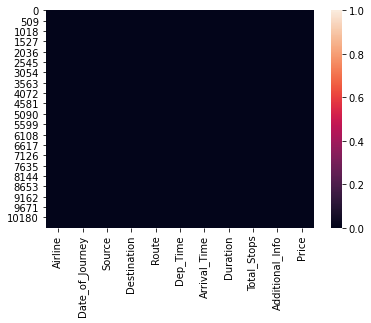

In [9]:
sn.heatmap(df.isnull())

In [10]:
df.dropna(axis=0,inplace=True)

In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [76]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [77]:
df1.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

# Visualization

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


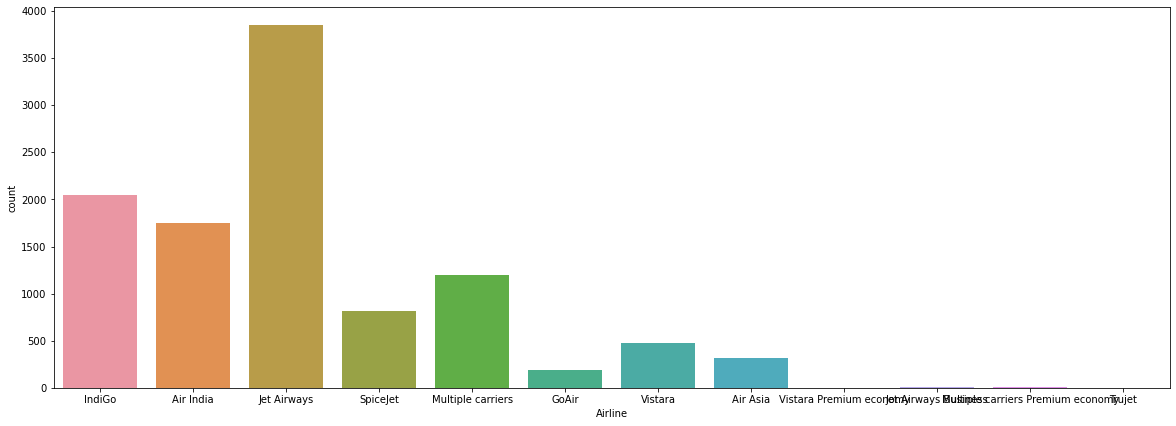

In [20]:
plt.figure(figsize=(20,7))
ax = sn.countplot(x="Airline", data=df)
print(df["Airline"].value_counts())

Jet Airways has more number of flight followed by Indigo

2019-05-18    504
2019-06-06    503
2019-05-21    497
2019-09-06    495
2019-12-06    493
2019-09-05    484
2019-03-21    423
2019-05-15    405
2019-06-03    403
2019-05-27    382
2019-06-27    355
2019-06-24    351
2019-01-06    342
2019-03-06    333
2019-06-15    328
2019-03-24    323
2019-03-03    315
2019-09-03    302
2019-03-27    299
2019-05-24    286
2019-06-05    281
2019-01-05    277
2019-12-05    259
2019-01-04    257
2019-01-03    199
2019-03-15    162
2019-03-18    156
2019-12-03    142
2019-09-04    125
2019-03-04    110
2019-06-21    109
2019-06-18    105
2019-06-04    100
2019-04-27     94
2019-04-24     92
2019-03-05     90
2019-04-15     89
2019-04-21     82
2019-04-18     67
2019-12-04     63
Name: Date_of_Journey, dtype: int64


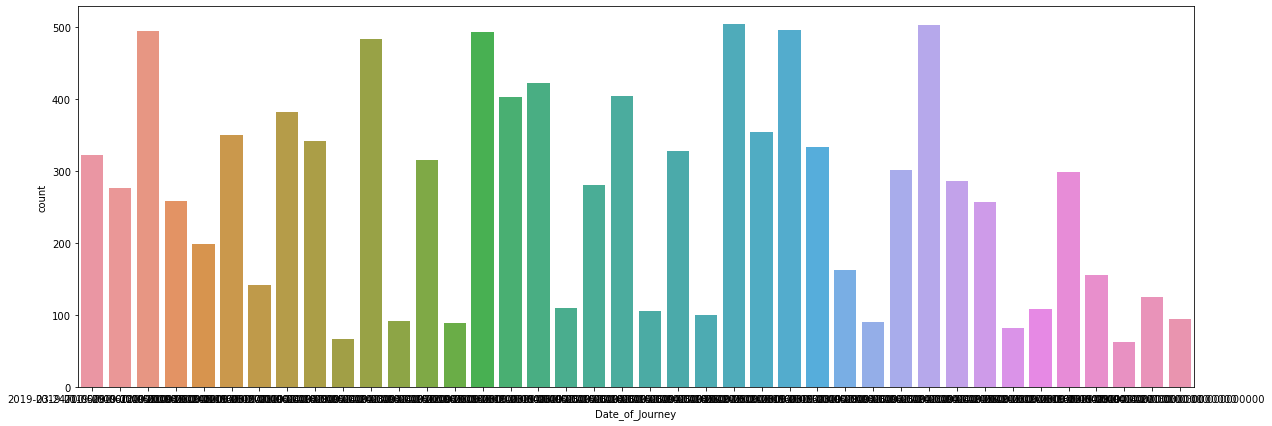

In [21]:
plt.figure(figsize=(20,7))
ax = sn.countplot(x="Date_of_Journey", data=df)
print(df["Date_of_Journey"].value_counts())

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


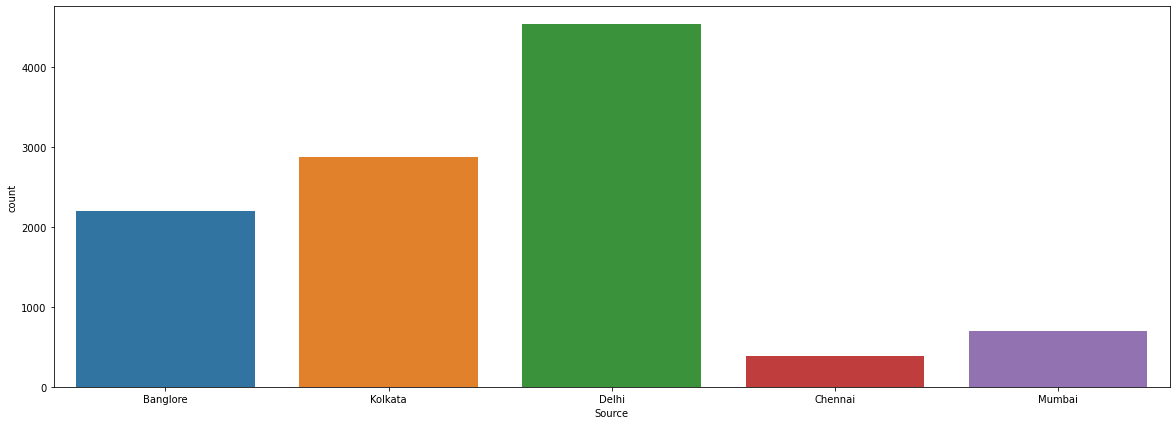

In [22]:
plt.figure(figsize=(20,7))
ax = sn.countplot(x="Source", data=df)
print(df["Source"].value_counts())

 4536 flights source airport is delhi followed by kolkata 2871

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


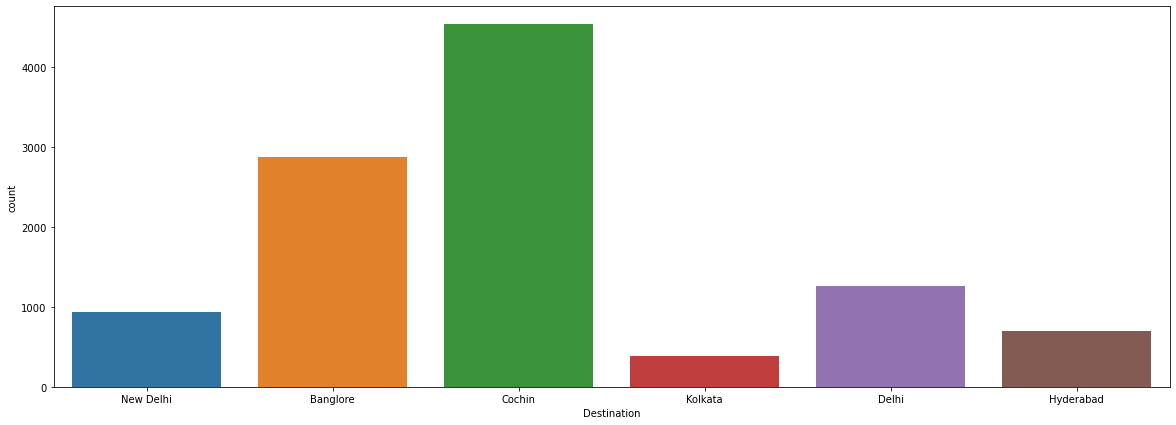

In [23]:
plt.figure(figsize=(20,7))
ax = sn.countplot(x="Destination", data=df)
print(df["Destination"].value_counts())

 4536 flights source airport is Cochin followed by bangalore 2871

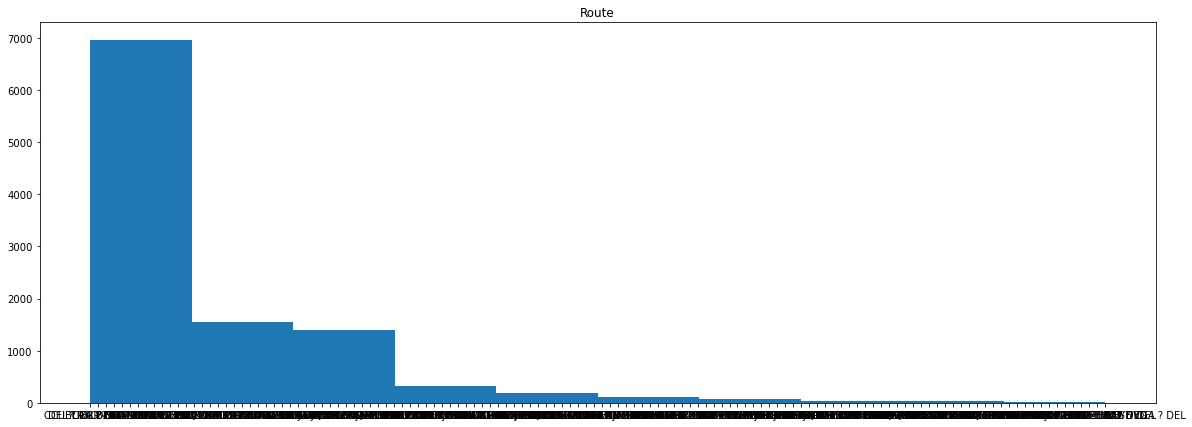

In [24]:
plt.figure(figsize=(20,7))
plt.hist(df["Route"])
plt.title('Route')
plt.show()

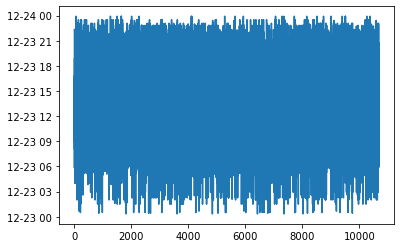

In [25]:
df['Dep_Time'].plot()
plt.show()

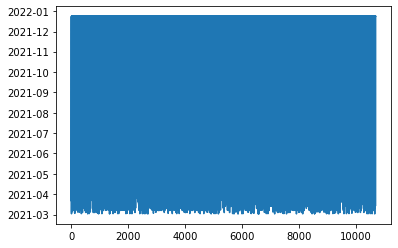

In [26]:
df['Arrival_Time'].plot()
plt.show()

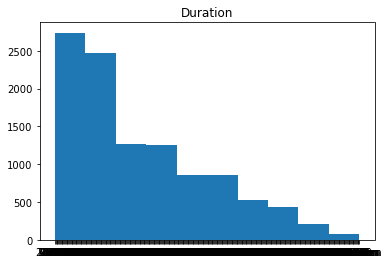

In [27]:
plt.hist(df["Duration"])
plt.title('Duration')
plt.show()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


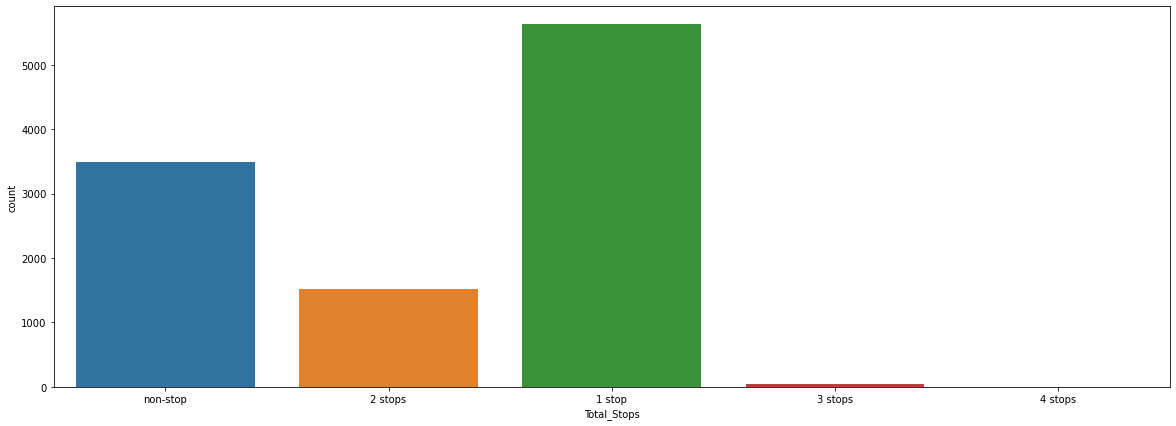

In [28]:
plt.figure(figsize=(20,7))
ax = sn.countplot(x="Total_Stops", data=df)
print(df["Total_Stops"].value_counts())

5625 has one stop followed by non stop 3491

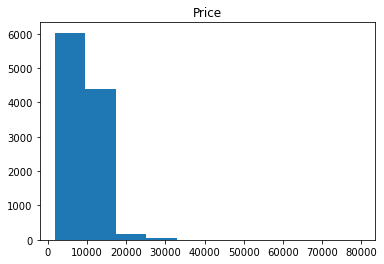

In [29]:
plt.hist(df["Price"])
plt.title('Price')
plt.show()

# Encoding Data

In [12]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [13]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=lb.fit_transform(df[i].values.reshape(-1,1))

In [14]:
for i in df1.columns:
    if df1[i].dtypes=="object":
        df1[i]=lb.fit_transform(df1[i].values.reshape(-1,1))

In [15]:
df.dtypes

Airline            int32
Date_of_Journey    int32
Source             int32
Destination        int32
Route              int32
Dep_Time           int32
Arrival_Time       int32
Duration           int32
Total_Stops        int32
Additional_Info    int32
Price              int64
dtype: object

In [16]:
df1.dtypes

Airline            int32
Date_of_Journey    int32
Source             int32
Destination        int32
Route              int32
Dep_Time           int32
Arrival_Time       int32
Duration           int32
Total_Stops        int32
Additional_Info    int32
dtype: object

In [33]:
df.describe()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952256,1.436154,74.820165,194.072177,1.458248,7.392998,9087.214567
std,2.352090,1.177276,1.474845,36.729039,108.625225,1.806320,1.214254,4611.548810
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,2.000000,0.000000,48.000000,106.000000,0.000000,8.000000,5277.000000
50%,4.000000,2.000000,1.000000,73.000000,233.000000,0.000000,8.000000,8372.000000
75%,4.000000,3.000000,2.000000,104.000000,280.000000,4.000000,8.000000,12373.000000
max,11.000000,4.000000,5.000000,127.000000,367.000000,4.000000,9.000000,79512.000000


In [55]:
df2.dtypes

Price    int64
dtype: object

# Correlation of the columns with the target columns

In [34]:
df.corr()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price
Airline,1.000000,-0.013397,0.018446,0.025214,0.027886,0.035973,-0.060748,-0.039565
Source,-0.013397,1.000000,-0.592576,0.403412,-0.192009,-0.225605,-0.022109,0.015999
Destination,0.018446,-0.592576,1.000000,-0.461176,0.022029,0.337872,0.026821,-0.071122
Route,0.025214,0.403412,-0.461176,1.000000,-0.062078,-0.437749,0.035152,0.164149
Duration,0.027886,-0.192009,0.022029,-0.062078,1.000000,0.175191,0.080166,-0.144280
Total_Stops,0.035973,-0.225605,0.337872,-0.437749,0.175191,1.000000,0.164054,-0.571221
Additional_Info,-0.060748,-0.022109,0.026821,0.035152,0.080166,0.164054,1.000000,-0.065463
Price,-0.039565,0.015999,-0.071122,0.164149,-0.144280,-0.571221,-0.065463,1.000000


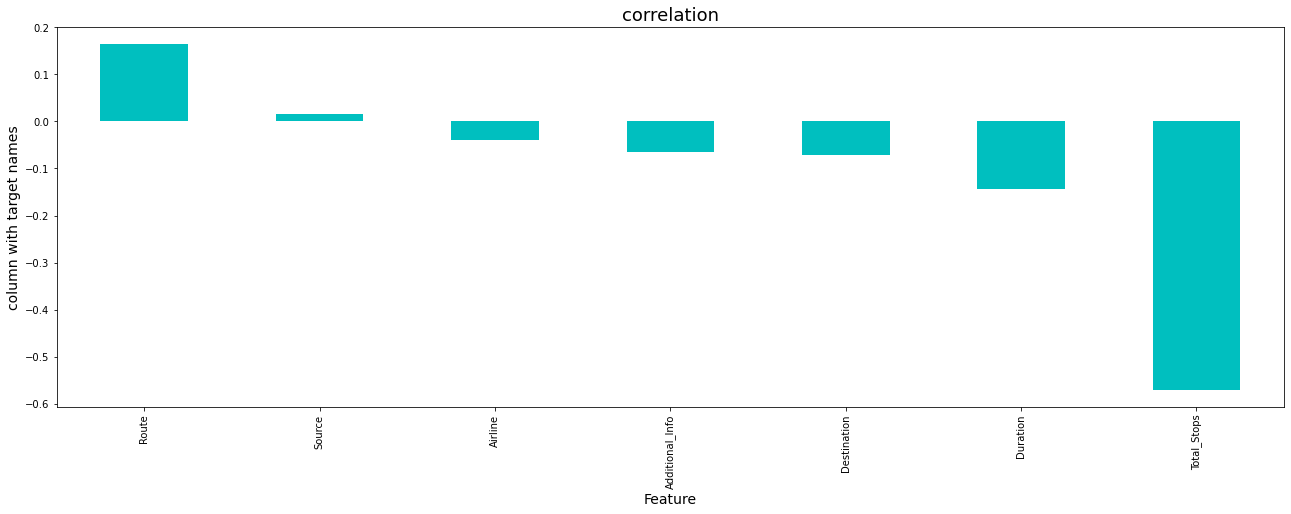

In [35]:
plt.figure(figsize=(22,7))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# Checking Outlier

Airline                AxesSubplot(0.125,0.71587;0.227941x0.16413)
Source              AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Destination         AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Route                 AxesSubplot(0.125,0.518913;0.227941x0.16413)
Duration           AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Total_Stops        AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Additional_Info       AxesSubplot(0.125,0.321957;0.227941x0.16413)
Price              AxesSubplot(0.398529,0.321957;0.227941x0.16413)
dtype: object

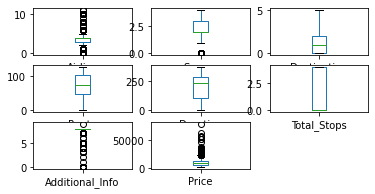

In [36]:
df.plot(kind='box',subplots=True,layout=(4,3))

In [37]:
df.shape

(10682, 11)

As train and test set is given so there is no need to outlier removal

In [17]:
x_train=df.iloc[:,:-1]
x_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,3,24,0,5,18,211,233,240,4,8
1,1,6,3,0,84,31,906,336,1,8
2,4,43,2,1,118,70,413,106,1,8
3,3,10,3,0,91,164,1324,311,0,8
4,3,0,0,5,29,149,1237,303,0,8
...,...,...,...,...,...,...,...,...,...,...
10678,0,41,3,0,64,183,1259,236,4,8
10679,1,29,3,0,64,193,1305,237,4,8
10680,4,29,0,2,18,58,824,280,4,8
10681,10,0,0,5,18,92,938,238,4,8


In [18]:
y_train=df.iloc[:,-1]
y_train

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [19]:
x_test=df1
x_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,39,2,1,76,138,150,10,0,5
1,3,10,3,0,65,31,353,248,0,5
2,4,22,2,1,76,156,566,148,0,3
3,6,22,2,1,76,48,633,36,0,5
4,0,27,0,2,16,198,135,216,4,5
...,...,...,...,...,...,...,...,...,...,...
2666,1,39,3,0,51,170,617,150,0,5
2667,3,28,3,0,43,106,507,213,4,5
2668,4,36,2,1,76,183,151,278,0,5
2669,1,36,2,1,76,11,577,60,0,5


In [20]:
y_test=df2
y_test

,Price
0,15998
1,16612
2,25572
3,25778
4,16934
...,...
2666,14046
2667,14086
2668,22720
2669,23544


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [22]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.0
              precision    recall  f1-score   support

        1965       0.00      0.00      0.00       0.0
        2227       0.00      0.00      0.00       0.0
        3100       0.00      0.00      0.00       0.0
        3419       0.00      0.00      0.00       0.0
        3540       0.00      0.00      0.00       0.0
        3543       0.00      0.00      0.00       0.0
        3597       0.00      0.00      0.00       0.0
        3841       0.00      0.00      0.00       0.0
        3873       0.00      0.00      0.00       0.0
        3943       0.00      0.00      0.00       0.0
        4282       0.00      0.00      0.00       0.0
        4591       0.00      0.00      0.00       0.0
        4804       0.00      0.00      0.00       0.0
        5277       0.00      0.00      0.00       0.0
        5298       0.00      0.00      0.00       0.0
        5636       0.00      0.00      0.00       0.0
        6316       0.00      0.00      0.00       0.0
        6

In [23]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.0
              precision    recall  f1-score   support

        2228       0.00      0.00      0.00       0.0
        2470       0.00      0.00      0.00       0.0
        2759       0.00      0.00      0.00       0.0
        3205       0.00      0.00      0.00       0.0
        3210       0.00      0.00      0.00       0.0
        3702       0.00      0.00      0.00       0.0
        4030       0.00      0.00      0.00       0.0
        4050       0.00      0.00      0.00       0.0
        4160       0.00      0.00      0.00       0.0
        4256       0.00      0.00      0.00       0.0
        4466       0.00      0.00      0.00       0.0
        4544       0.00      0.00      0.00       0.0
        4886       0.00      0.00      0.00       0.0
        4995       0.00      0.00      0.00       0.0
        5177       0.00      0.00      0.00       0.0
        5198       0.00      0.00      0.00       0.0
        5406       0.00      0.00      0.00       0.0
        5

In [24]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.0
              precision    recall  f1-score   support

        2071       0.00      0.00      0.00       0.0
        2228       0.00      0.00      0.00       0.0
        2385       0.00      0.00      0.00       0.0
        2470       0.00      0.00      0.00       0.0
        2759       0.00      0.00      0.00       0.0
        3100       0.00      0.00      0.00       0.0
        3205       0.00      0.00      0.00       0.0
        3210       0.00      0.00      0.00       0.0
        3257       0.00      0.00      0.00       0.0
        3332       0.00      0.00      0.00       0.0
        3383       0.00      0.00      0.00       0.0
        3419       0.00      0.00      0.00       0.0
        3502       0.00      0.00      0.00       0.0
        3543       0.00      0.00      0.00       0.0
        3573       0.00      0.00      0.00       0.0
        3625       0.00      0.00      0.00       0.0
        3815       0.00      0.00      0.00       0.0
        3

In [25]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.0
              precision    recall  f1-score   support

        1965       0.00      0.00      0.00       0.0
        3943       0.00      0.00      0.00       0.0
        4804       0.00      0.00      0.00       0.0
        5678       0.00      0.00      0.00       0.0
        6795       0.00      0.00      0.00       0.0
        7229       0.00      0.00      0.00       0.0
        8586       0.00      0.00      0.00       0.0
        9663       0.00      0.00      0.00       0.0
       10138       0.00      0.00      0.00       1.0
       10207       0.00      0.00      0.00       1.0
       10250       0.00      0.00      0.00       1.0
       10262       0.00      0.00      0.00       0.0
       10304       0.00      0.00      0.00       1.0
       10516       0.00      0.00      0.00       1.0
       10727       0.00      0.00      0.00       1.0
       10858       0.00      0.00      0.00       1.0
       11043       0.00      0.00      0.00       1.0
       11

In [ ]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
print(cross_val_score(lg,x,y,cv=5).mean())

In [ ]:
print(cross_val_score(dt,x,y,cv=5).mean())

In [ ]:
print(cross_val_score(rf,x,y,cv=5).mean())

In [ ]:
print(cross_val_score(svc,x,y,cv=5).mean())

In [ ]:
print(cross_val_score(kn,x,y,cv=5).mean())

# AUC ROC Curve

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [32]:
y_pred_prob=rf.predict_proba(x_test)
y_pred_prob

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
auc_score=roc_auc_score(y_test, y_pred_prob, multi_class='ovo', average='weighted')

In [ ]:
auc_score

In [ ]:
fpr = {}
tpr = {}
thresh ={}

n_class = 8

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

# Hyper Parameter Tuning

In [ ]:
parameter = {'n_estimators':[100,200, 400, 600, 800, 1000],'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,None],'criterion':{'gini', 'entropy'},'min_samples_split': [2, 5, 10]}

In [ ]:
from sklearn.model_selection import GridSearchCV
GV=GridSearchCV(rf,parameter,cv=5)

In [ ]:
GV.fit(x_train,y_train)

In [ ]:
GV.best_params_

In [ ]:
rf=RandomForestClassifier(n_estimators=200,max_depth=80,criterion='gini',min_samples_split=5)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

# Saving Model

In [ ]:
import pickle
filename = 'Flight_Ticket.pkl'
pickle.dump(rf, open(filename, 'wb'))